In [15]:
import sys
sys.path.append('/home/js2164/jan/repos/diffusion/score_sde_pytorch')
import os
os.chdir('/home/js2164/jan/repos/diffusion/score_sde_pytorch')
import torch
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [37]:
#path = 'logs/ksphere/2d_toy_2/svd/svd_23500.pkl'
#path = 'logs/ksphere/dim_10/n_1/random_isometry/non_uniform_0.5_sig_0.001/svd/svd_23000.pkl'
path = 'logs/ksphere/dim_[5, 30]/n_2/random_isometry/different_dims_different_radii/svd/svd_26000.pkl'
with open(path, 'rb') as f:
    svd = pickle.load(f)

singular_values = svd['singular_values']

In [38]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
#from scipy.special import softmax as 

dims = []
for sing_vals in singular_values:
    difference = np.array([sing_vals[i-1] / sing_vals[i] for i in range(1, len(sing_vals))])
    probs = softmax(difference)
    d = len(probs) - np.argmax(probs)
    dims.append(d)

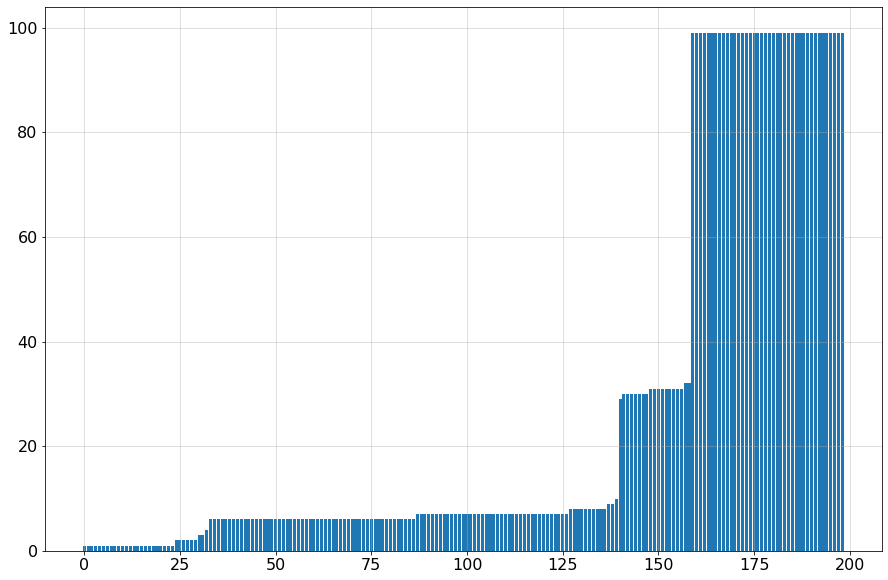

In [39]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 16})
#if alpha > 0:
#    plt.title(f'Non-uniform distribution $\\alpha={alpha}$')
#else:
#    plt.title(f'Uniform distribution')
plt.grid(alpha=0.5)
plt.bar(range(len(dims)), np.sort(dims))
#plt.xlabel('i-th point')
#plt.ylabel('Estimated dimension at i-th point')
#alpha_str =str(alpha).replace('.', '_')
#plt.savefig(f'figures/non_uniform_{alpha_str}', dpi=300, facecolor='white')
plt.show()

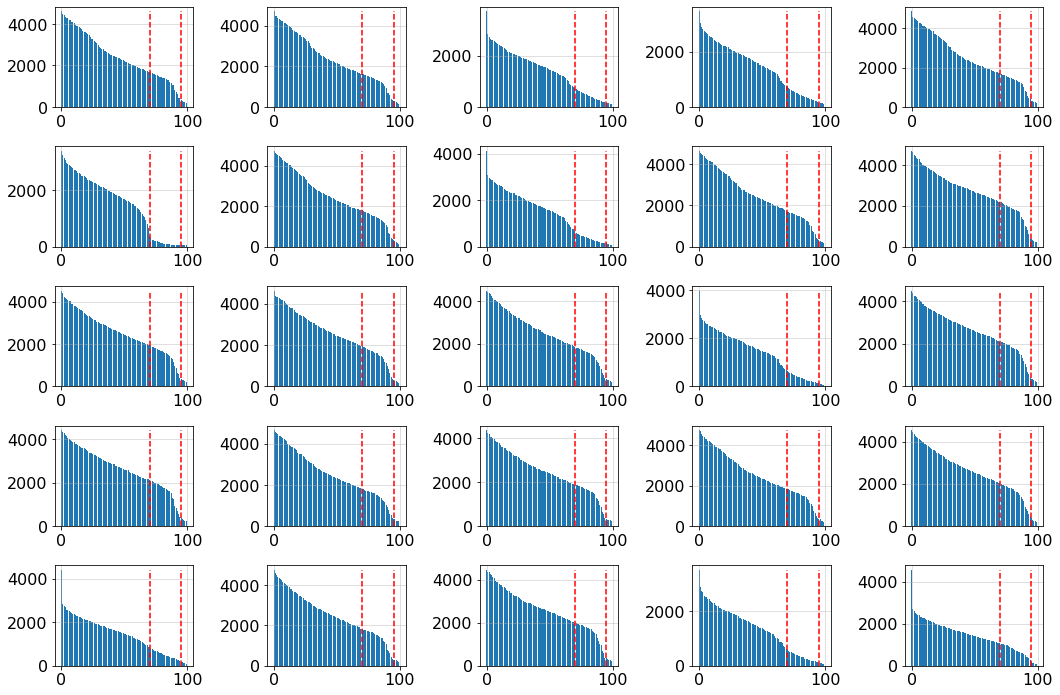

In [42]:
fig = plt.figure(figsize=(15,10))
for i, s in enumerate(singular_values[:25]):
    ax = fig.add_subplot(5, 5, i+1)
    #ax.rcParams.update({'font.size': 16})
    ax.grid(alpha=0.5)
    ax.bar(range(len(s)), s)
    #ax.xticks(range(0, 100, 5))
    ax.vlines(95, 0, np.max(s), color='r', linestyles='--')
    ax.vlines(70, 0, np.max(s), color='r', linestyles='--')
fig.tight_layout()
fig.show()

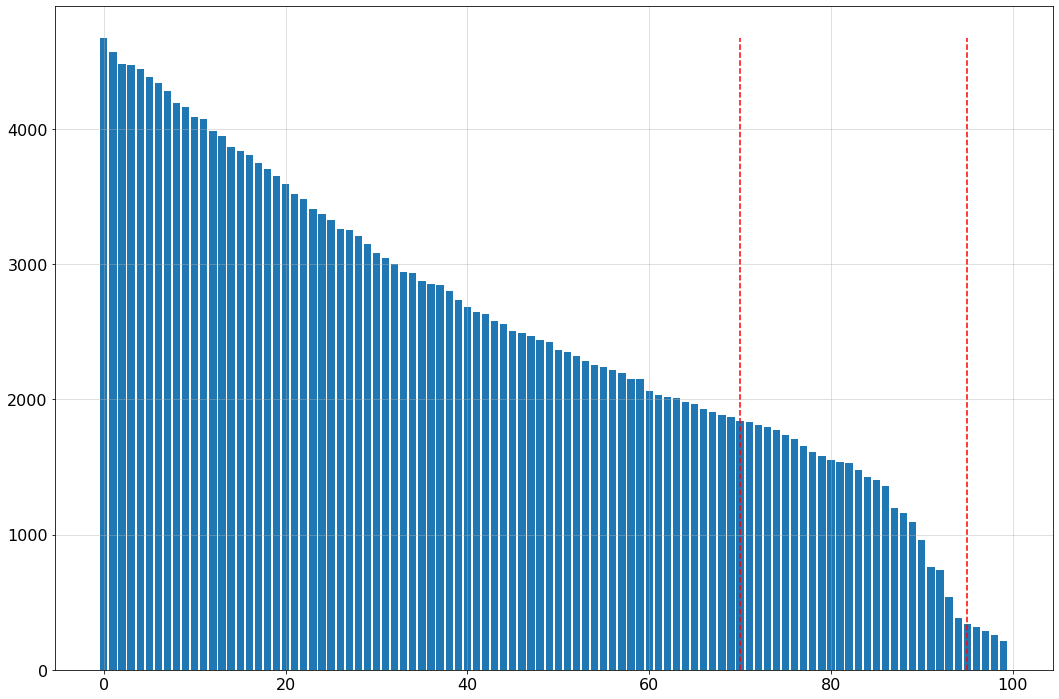

In [44]:
s = singular_values[100]
fig = plt.figure(figsize=(15,10))
#ax.rcParams.update({'font.size': 16})
plt.grid(alpha=0.5)
plt.bar(range(len(s)), s)
#plt.xticks(range(0, 100, 5))
plt.vlines(95, 0, np.max(s), color='r', linestyles='--')
plt.vlines(70, 0, np.max(s), color='r', linestyles='--')
fig.tight_layout()
fig.show()